In [105]:
import pandas as pd 
import random 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches
import os
import os
import subprocess
from concurrent.futures import ProcessPoolExecutor,ThreadPoolExecutor,as_completed
from tqdm import tqdm
import random
os.environ['OMP_THREAD_LIMIT'] = '1'

import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


In [3]:



def display_image(image):
    plt.figure(figsize=(10, 30))
    plt.imshow(image )
    plt.axis('off') 
    plt.show()  
def draw_bounding_boxes(image, coordinates):
    """
    Draw bounding boxes on the image based on the provided coordinates.
    """
    draw = ImageDraw.Draw(image)
    for coord in coordinates:
        draw.rectangle(coord, outline="red")  # You can change the color or other properties as needed
    return image

def pil_to_cv(pil_image):
    cv_image = np.array(pil_image)
    cv_image = cv_image[:, :, ::-1].copy()
    return cv_image

In [6]:
directory_path = 'YOLOX_outputs/yolox_voc_s/vis_res/'
img_src_dir = "../images"

In [198]:
!python tools/demo.py image -f exps/example/yolox_voc/yolox_voc_s.py -c ../models/best_ckpt_rib_aug.pth --path ../images/p4.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result --device cpu

[0.2120434194803238, 277.8250732421875, 466.7277526855469, 325.0995178222656]
[0.8863562345504761, 0.6085729002952576]
./YOLOX_outputs\yolox_voc_s\vis_res\2024_02_29_18_12_36\bboxes.txt


2024-02-29 18:12:35.399 | INFO     | __main__:main:273 - Args: Namespace(demo='image', experiment_name='yolox_voc_s', name=None, path='../images/p4.jpg', camid=0, save_result=True, exp_file='exps/example/yolox_voc/yolox_voc_s.py', ckpt='../models/best_ckpt_rib_aug.pth', device='cpu', conf=0.25, nms=0.45, tsize=640, fp16=False, legacy=False, fuse=False, trt=False)
OMP: Warning #96: Cannot form a team with 4 threads, using 1 instead.
OMP: Hint Consider unsetting KMP_DEVICE_THREAD_LIMIT (KMP_ALL_THREADS), KMP_TEAMS_THREAD_LIMIT, and OMP_THREAD_LIMIT (if any are set).
2024-02-29 18:12:36.403 | INFO     | __main__:main:283 - Model Summary: Params: 8.94M, Gflops: 26.76
2024-02-29 18:12:36.404 | INFO     | __main__:main:296 - loading checkpoint
2024-02-29 18:12:36.485 | INFO     | __main__:main:300 - loaded checkpoint done.
2024-02-29 18:12:37.399 | INFO     | __main__:inference:165 - Infer time: 0.8990s
2024-02-29 18:12:37.401 | INFO     | __main__:image_demo:205 - Saving detection result in

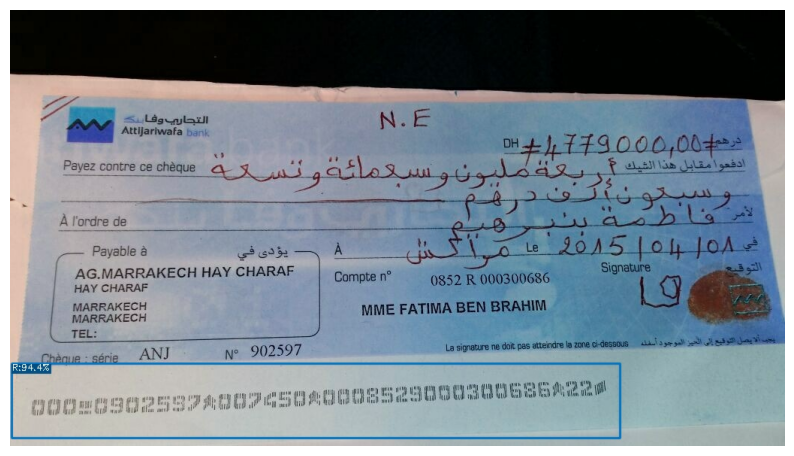

In [3]:
img = cv2.imread('YOLOX_outputs/yolox_voc_s/vis_res/2024_02_29_01_14_24/p1jpg')
display_image(img)

In [9]:
!python tools/demo.py image -f exps/example/yolox_voc/yolox_voc_s.py -c ../models/best_ckpt_rib_aug.pth --path ../images/p4.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result --device cpu

2024-02-29 08:13:03.645 | INFO     | __main__:main:259 - Args: Namespace(demo='image', experiment_name='yolox_voc_s', name=None, path='../images/p4.jpg', camid=0, save_result=True, exp_file='exps/example/yolox_voc/yolox_voc_s.py', ckpt='../models/best_ckpt_rib_aug.pth', device='cpu', conf=0.25, nms=0.45, tsize=640, fp16=False, legacy=False, fuse=False, trt=False)
OMP: Warning #96: Cannot form a team with 4 threads, using 1 instead.
OMP: Hint Consider unsetting KMP_DEVICE_THREAD_LIMIT (KMP_ALL_THREADS), KMP_TEAMS_THREAD_LIMIT, and OMP_THREAD_LIMIT (if any are set).
2024-02-29 08:13:04.524 | INFO     | __main__:main:269 - Model Summary: Params: 8.94M, Gflops: 26.76
2024-02-29 08:13:04.525 | INFO     | __main__:main:282 - loading checkpoint
2024-02-29 08:13:04.599 | INFO     | __main__:main:286 - loaded checkpoint done.
2024-02-29 08:13:05.413 | INFO     | __main__:inference:165 - Infer time: 0.7931s
2024-02-29 08:13:05.415 | INFO     | __main__:image_demo:202 - Saving detection result in

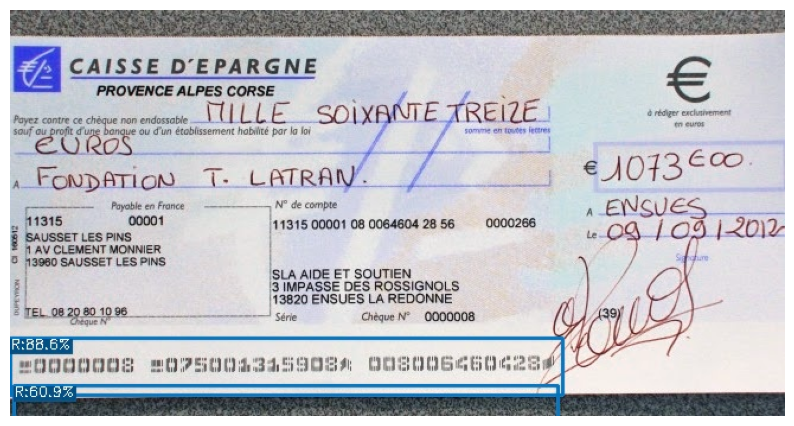

In [11]:
img = cv2.imread('YOLOX_outputs/yolox_voc_s/vis_res/2024_02_29_08_13_04/p4.jpg')
display_image(img)

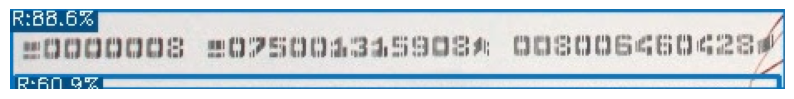

In [180]:
display_image( cropped_image )

In [169]:
import subprocess
import time 


def run_demo_command(imge_name  , img_src_dir = "../images"):
    img_path = os.path.join(img_src_dir, imge_name )
    command = [
        "python", 
        "tools/demo.py", 
        "image", 
        "-f", "exps/example/yolox_voc/yolox_voc_s.py", 
        "-c", "../models/best_ckpt_rib_aug.pth", 
        "--path", img_path , 
        "--conf", "0.25", 
        "--nms", "0.45", 
        "--tsize", "640", 
        "--save_result", 
        "--device", "cpu"
    ]
    subprocess.run(command)
start_time = time.time() 
run_demo_command('p2.jpg')
end_time = time.time()  # Record end time
execution_time = end_time - start_time 
execution_time

6.947161912918091

In [170]:
import os

def get_last_created_files(directory):
    all_folders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    all_folders.sort(key=lambda x: os.path.getctime(os.path.join(directory, x)))
    if all_folders:
        directory = os.path.join(directory, all_folders[-1])
        contents  = os.listdir(directory)
        for cnt in contents :
            if cnt.endswith(".txt"):
                bboxes_path =  os.path.join(directory , cnt )
            else : 
                image_path =  os.path.join(directory , cnt )
        return image_path , bboxes_path 
    else:
        return None
    

last_folder_name = get_last_created_files(directory_path)
print("Last created files are :", last_folder_name)


Last created files are : ('YOLOX_outputs/yolox_voc_s/vis_res/2024_03_01_12_16_52\\p2.jpg', 'YOLOX_outputs/yolox_voc_s/vis_res/2024_03_01_12_16_52\\bboxes.txt')


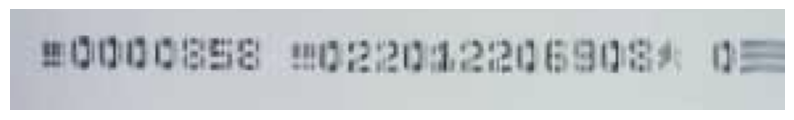

In [171]:
def crop_bounding_boxes(image_path, bboxes_path):
    image = cv2.imread(image_path)
    with open(bboxes_path, 'r') as file:
        lines = file.readlines()
        cropped_images = []
        RIB_bbox = []
        max_score = 0
        for line in lines:
            score = line.strip().split()[-1]
            if float(score) > max_score :
                RIB_bbox = [int(float(coord)) for coord in line.strip().split()[:4]] 
                max_score = float(score)
        cropped_image = image[RIB_bbox[1]:RIB_bbox[3], RIB_bbox[0]:RIB_bbox[2]]
    return cropped_image

image_path , bboxes_path = get_last_created_files(directory_path)
cropped_image = crop_bounding_boxes(image_path, bboxes_path) 
display_image(cropped_image)

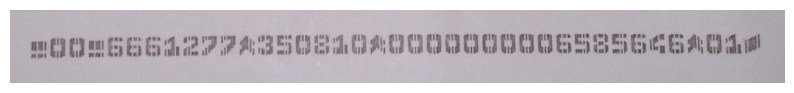

In [139]:

def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

def ajuste_rotation(image ):
    grayscale = cv2.cvtColor( image  , cv2.COLOR_BGR2GRAY)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, (0, 0, 0))
    return rotated
rotated_image = ajuste_rotation( cropped_image )
display_image( rotated_image  )

In [110]:
type(rotated_image )

numpy.ndarray

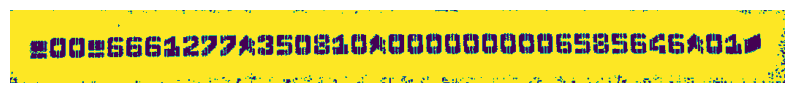

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_threshold(image, block_size, constant):
    # Convert to grayscale if the image is colored
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding
    binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
    
    return binary_image

# Example grayscale image
image = rotated_image 

# Define parameters for adaptive thresholding
block_size = 67
constant = 2

binary_image = adaptive_threshold(image, block_size, constant)
display_image(binary_image)

In [ ]:
def sharpen_image(image, alpha=1.5, beta=-0.5):
    blurred = cv2.GaussianBlur(image, (255, 255), 3)
    sharpened = cv2.addWeighted(image, alpha, blurred, beta, 0)
    return sharpened

.00.6661277;350810;0000000006585646;01-



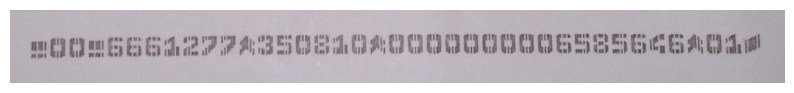

In [143]:
print(pytesseract.image_to_string(rotated_image  , lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))
display_image(rotated_image )

p1.jpg
4 .--44444;43;44;411
50;0008529000300686;22-
10""";";- ; ; 222888.15----



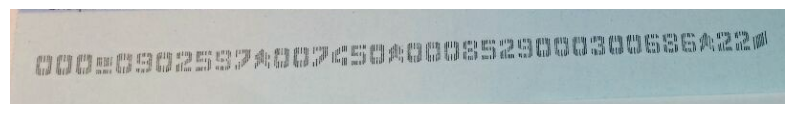

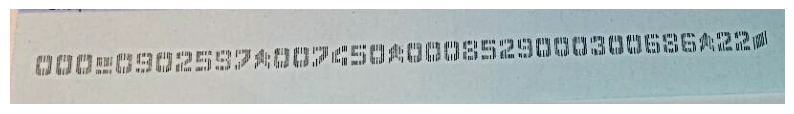

084000 5 -—-———————;;";"‘c;c;aGaGaG;Gaaaeaes ; ;
| 000.0902587;007450;0008529000300686;22-
10;;;;;";"r;;ms--a43;2228;;8;;.-



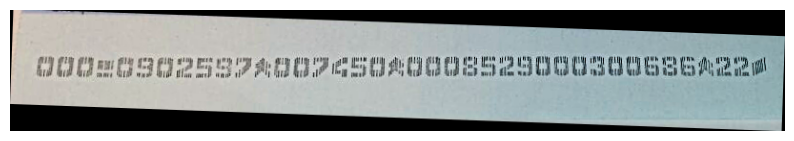

p2.jpg
;



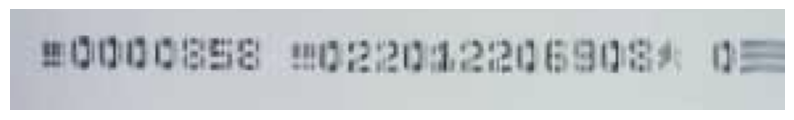

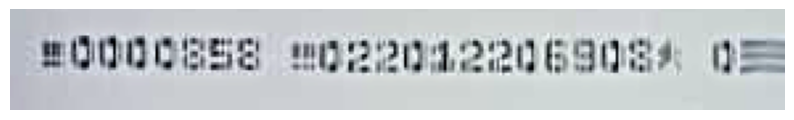

.0000858.022012206908;0



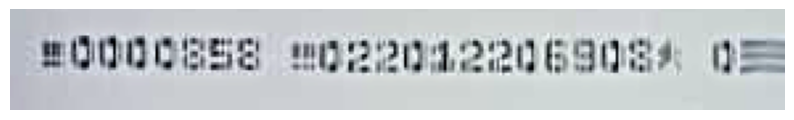

p3.jpg
| .00.9972584;23050042460175211008800;76-



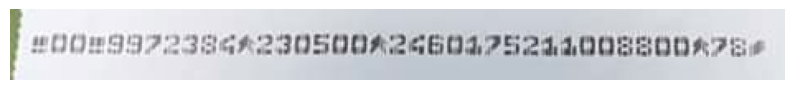

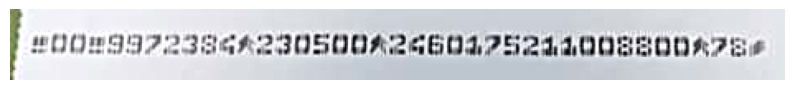

| .00.9972384;230500A42460175211008800;76-



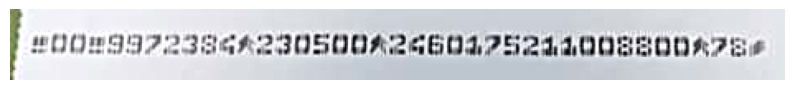

p4.jpg
.00000082075001315908;008006466 428



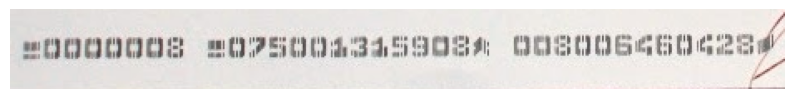

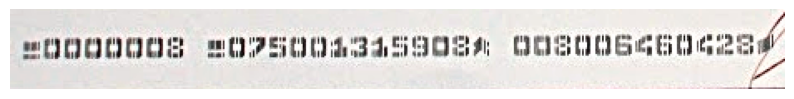

.00000088.075001815908; 0930084604284



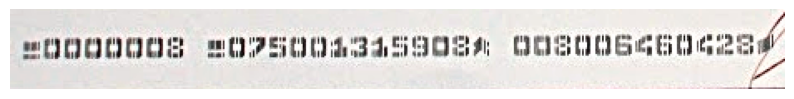

p5.jpg
p6.jpg
.00.6661277;350810;0000000006585646;01-



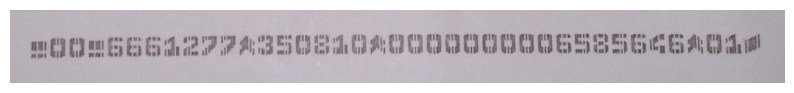

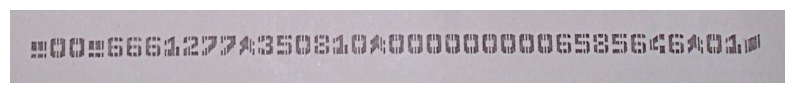

4009- 1a4069 .6649 .0-
; 69 .774 .1908- 4 ; 009- ouv.;- 4 6;9 -
.004 669 1;277- .196-



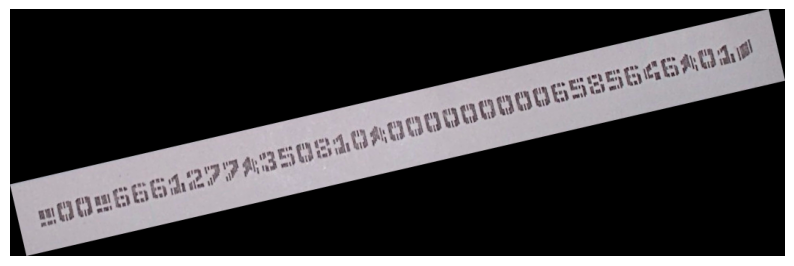

p8.jpg
p9.jpg
013.6663329;190780;2111654078450000;61-



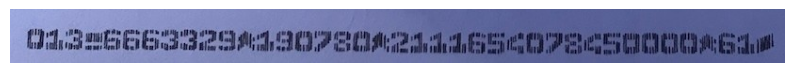

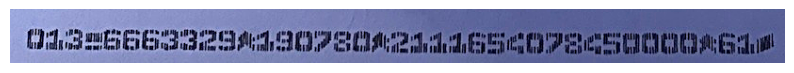

; 22 - _



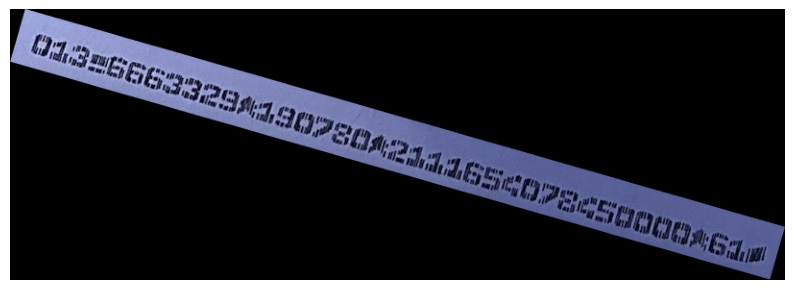

In [206]:

for filename in os.listdir(img_src_dir):
    try : 
        run_demo_command(filename)
        print(filename)
        image_path , bboxes_path = get_last_created_files(directory_path)
        cropped_image = crop_bounding_boxes(image_path, bboxes_path) 
        rotated_image = ajuste_rotation( cropped_image )
        print(pytesseract.image_to_string(rotated_image  , lang='digi', config='--psm 6 -c tessedit_char_whitelist=0123456789;.-'))
        display_image(cropped_image)
        sharped_image = sharpen_image(cropped_image , alpha=1.3, beta=-0.3)
        cropped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
        display_image(cropped_image)
        rotated_image = ajuste_rotation( cropped_image )
        print(pytesseract.image_to_string(rotated_image  , lang='digi', config='--psm 6 -c tessedit_char_whitelist=0123456789;.-'))
        display_image(rotated_image )
    except : pass 

    
        

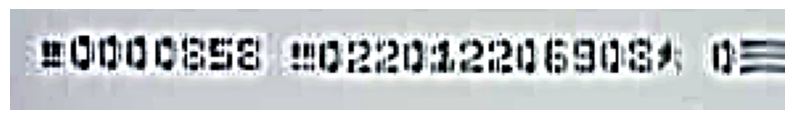

In [200]:
def sharpen_image(image, alpha=1.5, beta=-0.5):
    blurred = cv2.GaussianBlur(image, (255, 255), 3)
    sharpened = cv2.addWeighted(image, alpha, blurred, beta, 0)
    return sharpened
sharped_image = sharpen_image(cropped_image , alpha=1.3, beta=-0.3)
sharped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
sharped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
sharped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
sharped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
sharped_image = sharpen_image(sharped_image  , alpha=1.3, beta=-0.3)
display_image(sharped_image ) # alpha=1.5, beta=-0.5

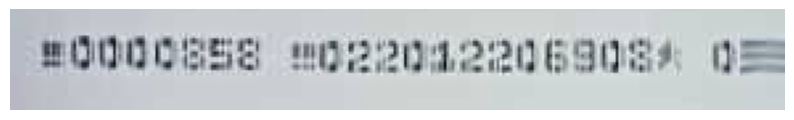

In [189]:
rotated_image = ajuste_rotation( sharped_image  )
display_image( rotated_image  )

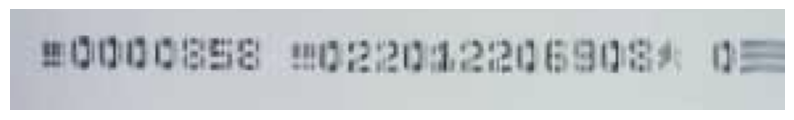

In [192]:
display_image(cropped_image )

In [147]:
def pil_to_cv(pil_image):
    cv_image = np.array(pil_image)
    cv_image = cv_image[:, :, ::-1].copy()
    return cv_image

def cv_to_pil(cv_img):
    # return Image.fromarray(img)
    return Image.fromarray(cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB))
    
def add_random_noise(image):
    row, col, ch = image.shape
    mean = -1
    var = 0.5
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    return noisy_image.astype('uint8')

def apply_gaussian_blur(image, kernel_size=5):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

def apply_motion_blur(image, kernel_size=5):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    blurred_image = cv2.filter2D(image, -1, kernel)
    return blurred_image

def apply_perspective_transform_with_boxes(image, boxes, delta=2):
    rows, cols, ch = image.shape
    pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
    pts2 = np.float32([
        [50 + np.random.randint(-delta, delta), 50 + np.random.randint(-delta, delta)],
        [200 + np.random.randint(-delta, delta), 50 + np.random.randint(-delta, delta)],
        [50 + np.random.randint(-delta, delta), 200 + np.random.randint(-delta, delta)],
        [200 + np.random.randint(-delta, delta), 200 + np.random.randint(-delta, delta)]
    ])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    transformed_image = cv2.warpPerspective(image, M, (cols, rows))
    
    transformed_boxes = []
    for box in boxes:
        # Assuming box is a tuple (x1, y1, x2, y2)
        pts = np.float32([
            [box[0], box[1]],
            [box[2], box[1]],
            [box[0], box[3]],
            [box[2], box[3]]
        ]).reshape(-1, 1, 2)
        
        # Apply the transformation to each corner of the bounding box
        transformed_pts = cv2.perspectiveTransform(pts, M)
        
        # Recalculate the bounding box as the min/max x and y coordinates of the transformed points
        x_coords = transformed_pts[:, 0, 0]
        y_coords = transformed_pts[:, 0, 1]
        new_box = (min(x_coords), min(y_coords), max(x_coords), max(y_coords))
        transformed_boxes.append(new_box)
    
    return transformed_image, transformed_boxes

def adjust_brightness_contrast(image, brightness=0, contrast=100):
    new_image = np.zeros(image.shape, image.dtype)

    alpha = np.random.randint(1,5)
    beta = np.random.randint(-10,10)
    # print(alpha,beta)
    # Adjust brightness and contrast
    new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return new_image


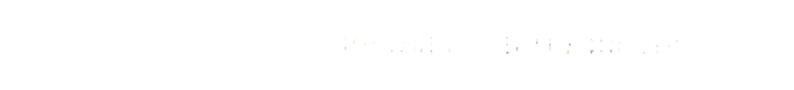

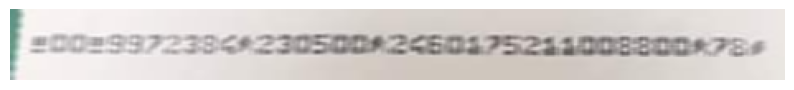

-



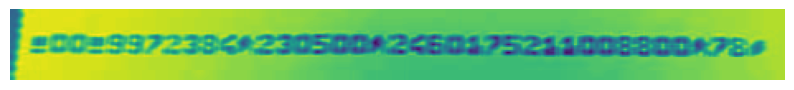

-



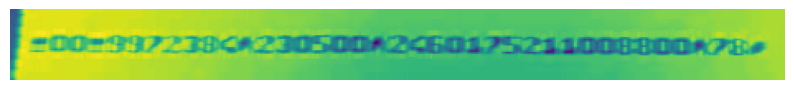

|



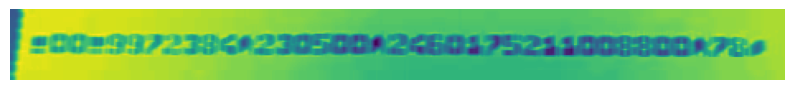

| 260- 1972384;230500;2460175211008800;71-



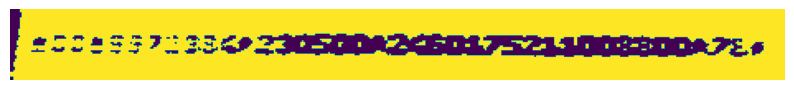

16548571330;230500;2460175213000800-72 -



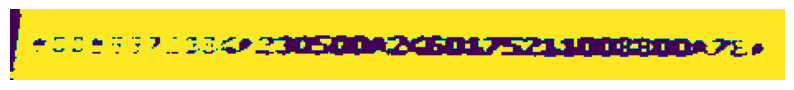

4 11723387250500;2460175213006800;78-



In [16]:

adjusted = adjust_brightness_contrast(pil_to_cv(cropped_image ))
display_image(adjusted )
print(pytesseract.image_to_string(adjusted, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


blurred = apply_motion_blur(pil_to_cv(cropped_image ))
display_image(blurred  )
print(pytesseract.image_to_string(blurred, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


blurred_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
display_image(blurred_gray )
print(pytesseract.image_to_string(blurred_gray, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


kernel = np.ones((3,1), np.uint8) # cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
dilated = cv2.dilate(blurred_gray, kernel, iterations=1)
display_image(dilated )
print(pytesseract.image_to_string(kernel, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
eroded_image = cv2.erode(dilated, kernel, iterations=1)
display_image(eroded_image )
print(pytesseract.image_to_string(eroded_image, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


_, thresh = cv2.threshold(blurred_gray, 230, 255,  cv2.THRESH_OTSU  )
display_image( thresh )
print(pytesseract.image_to_string(thresh , lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


kernel_d = cv2.getStructuringElement(cv2.MORPH_RECT, (3,1))
dilated_thresh = cv2.dilate(thresh, (3,1), iterations=1)
display_image( dilated_thresh )
print(pytesseract.image_to_string(dilated_thresh, lang='digi', config='--psm 7 -c tessedit_char_whitelist=0123456789;.-'))


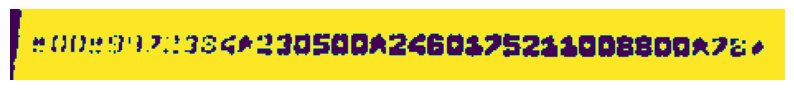

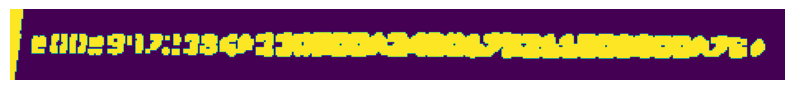

In [17]:
import cv2
import matplotlib.pyplot as plt

def convert_image_to_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

def threshold_image(grayscale_image):
    thresholded_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return thresholded_image

def invert_image(thresholded_image):
    inverted_image = cv2.bitwise_not(thresholded_image)
    return inverted_image

def dilate_image(inverted_image):
    dilated_image = cv2.dilate(inverted_image, None, iterations=1)
    return dilated_image

grayscale_image = convert_image_to_grayscale(np.array(cropped_image))
thresholded_image = threshold_image(cv2.GaussianBlur(grayscale_image , (3, 3), 0))
display_image(thresholded_image)
inverted_image = invert_image(thresholded_image)
dilated_image = dilate_image(inverted_image)
display_image(dilated_image)

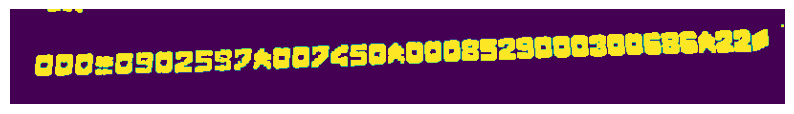

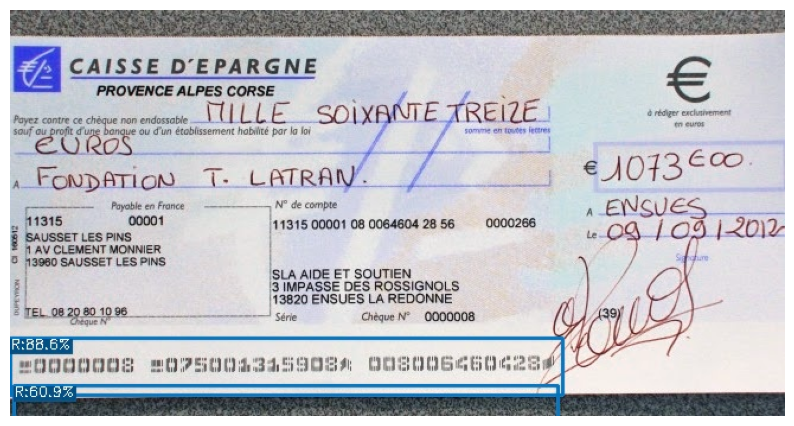

Text(0.5, 1.0, 'Dilated Image')

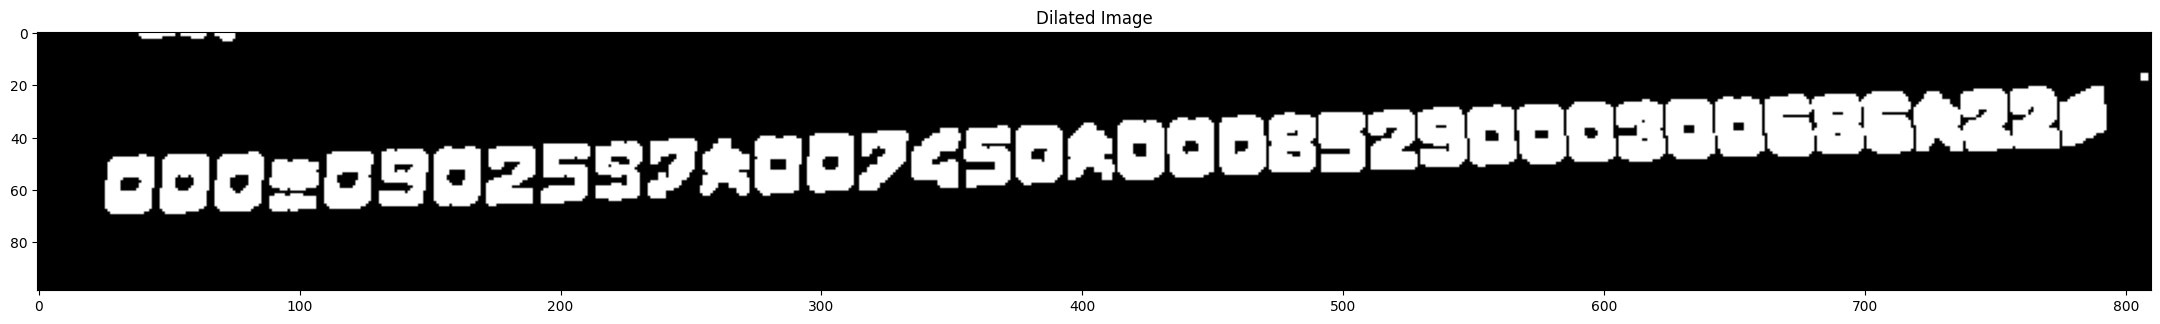

In [239]:
display_image(dilated_image)
display_image(image)

plt.figure(figsize=(60, 600))
plt.subplot(224)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')


In [124]:
import torch
from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.exp import get_exp
from tools.demo import Predictor  # Assuming demo.py is in the same directory

# 1. Load YOLOX configuration and model weights
exp_file = "exps/example/yolox_voc/yolox_voc_s.py"  # Path to the experiment configuration file
checkpoint_file = "../models/best_ckpt_rib_aug.pth"  # Path to the checkpoint file
device = "cpu"  # Device to run the model, "cpu" or "cuda"

# Load experiment configuration
exp = get_exp(exp_file)

# Load model checkpoint
model = exp.get_model()
model.eval()
checkpoint = torch.load(checkpoint_file, map_location=torch.device(device))
model.load_state_dict(checkpoint["model"])

# 2. Instantiate the Predictor object
predictor = Predictor(
    model=model,
    exp=exp,
    cls_names=COCO_CLASSES,  # Classes list
    trt_file=None,  # Optional TensorRT file if using TensorRT
    decoder=None,  # Decoder object (not provided in this example)
    device=device,  # Device to run the model
    fp16=False,  # Whether to use FP16 precision
    legacy=False,  # Whether to use legacy compatibility mode
)

# Now you can use the predictor object for inference


In [125]:
def image_demo(predictor, vis_folder, path, current_time, save_result):
    if os.path.isdir(path):
        files = get_image_list(path)
    else:
        files = [path]
    files.sort()

    results = []  # Store results here

    for image_name in files:
        outputs, img_info = predictor.inference(image_name)
        result_image, bboxes = predictor.visual(outputs[0], img_info, predictor.confthre)
        
        # Append result and bboxes to results list
        results.append((result_image, bboxes))

        if save_result:
            # Save the result image
            save_folder = os.path.join(
                vis_folder, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
            )
            os.makedirs(save_folder, exist_ok=True)
            save_file_name = os.path.join(save_folder, os.path.basename(image_name))
            logger.info("Saving detection result in {}".format(save_file_name))
            cv2.imwrite(save_file_name, result_image)

            file_path = os.path.join(save_folder, "bboxes.txt")
            print(file_path)
            # Open the file in write mode and write the bboxes content
            with open(file_path, 'w') as file:
                for bbox in bboxes.tolist():
                    bbox_str = ' '.join(map(str, bbox)) + '\n'  # Convert tuple to string and add newline character
                    file.write(bbox_str)

        ch = cv2.waitKey(0)
        if ch == 27 or ch == ord("q") or ch == ord("Q"):
            break

    return results  # Return the results


In [128]:
# Run the YOLOX detection
vis_folder  = '/YOLOX_outputs/yolox_voc_s/vis_res'
args = make_parser().parse_args()
exp = get_exp(args.exp_file, args.name)
results = image_demo(predictor, vis_folder, args.path, current_time, args.save_result)

# Access the result of the first image
result_image, bboxes = results[0]

usage: YOLOX Demo! [-h] [-expn EXPERIMENT_NAME] [-n NAME] [--path PATH] [--camid CAMID] [--save_result] [-f EXP_FILE]
                   [-c CKPT] [--device DEVICE] [--conf CONF] [--nms NMS] [--tsize TSIZE] [--fp16] [--legacy] [--fuse]
                   [--trt]
                   demo
YOLOX Demo!: error: the following arguments are required: demo


SystemExit: 2

In [41]:
import cv2

def preprocess_image(image, target_size):
    # Resize the image to the target size
    resized_image = cv2.resize(image, target_size)
    # Convert the image to RGB format (if it's not already in RGB)
    if len(resized_image.shape) == 2:  # If the image is grayscale
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    elif resized_image.shape[2] == 1:  # If the image has a single color channel
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    else:  # If the image is in BGR format
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    # Normalize pixel values to the range [0, 1]
    normalized_image = resized_image.astype("float32") / 255.0
    return normalized_image

# Original image shape: (581, 1032, 3)

target_size = (640, 640)  # Adjust according to model requirements
preprocessed_image = preprocess_image(img, target_size)
preprocessed_image

array([[[0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        ...,
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ]],

       [[0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        ...,
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ]],

       [[0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        [0.23137255, 0.5176471 , 0.4       ],
        ...,
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ],
        [0.12156863, 0.48235294, 0.3372549 ]],

       ...,

       [[0.29411766, 0.54509807, 0.4392157 ],
        [0.29411766, 0.54509807, 0.4392157 ],
        [0.29411766, 0

In [49]:
preprocessed_image_tensor = torch.from_numpy(preprocessed_image).unsqueeze(0).repeat(2, 1, 1, 1).to(device).float()

# Perform inference
with torch.no_grad():
    outputs = model(preprocessed_image_tensor)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 2 but got size 1 for tensor number 2 in the list.

In [55]:
def display_image(image):
    plt.figure(figsize=(10, 30))
    plt.imshow(image )
    plt.axis('off') 
    plt.show()  
def draw_bounding_boxes(image, coordinates):
    """
    Draw bounding boxes on the image based on the provided coordinates.
    """
    draw = ImageDraw.Draw(image)
    for coord in coordinates:
        draw.rectangle(coord, outline="red")  # You can change the color or other properties as needed
    return image
img = Image.open(image_path)


In [62]:
import cv2
import torch
from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.exp import get_exp
from yolox.utils import postprocess

def load_model(exp_file, ckpt_file):
    # Load experiment configuration
    exp = get_exp(exp_file)
    
    # Load YOLOX model
    model = exp.get_model()
    
    # Load model checkpoint
    ckpt = torch.load(ckpt_file, map_location="cpu")
    model.load_state_dict(ckpt["model"])
    model.eval()
    
    return model, exp

def preprocess_image(image_path, test_size):
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image
    img = cv2.resize(img, test_size)
    
    # Normalize the image
    img = img.astype('float32') / 255.0
    
    # Convert the image to tensor
    img = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0)
    
    return img

def predict_objects(model, exp, img):
    # Perform inference
    with torch.no_grad():
        outputs = model(img)
        outputs = postprocess(outputs, exp.num_classes, exp.test_conf, exp.nmsthre, class_agnostic=True)
    
    return outputs

def get_bounding_boxes(image_path, exp_file, ckpt_file, test_size=(640, 640)):
    # Load YOLOX model
    model, exp = load_model(exp_file, ckpt_file)
    
    # Preprocess the image
    img = preprocess_image(image_path, test_size)
    
    # Perform inference and get bounding box coordinates
    outputs = predict_objects(model, exp, img)
    
    # Extract bounding box coordinates
    #boxes = outputs[:, 0:4].cpu().numpy()
    
    return outputs

# Example usage
image_path = '../images/p2.jpg'
exp_file = "exps/example/yolox_voc/yolox_voc_s.py"
ckpt_file = "../models/best_ckpt_rib_aug.pth"
bounding_boxes = get_bounding_boxes(image_path, exp_file, ckpt_file)
output = bounding_boxes


In [63]:
import os
import cv2
import torch
from yolox.data.data_augment import ValTransform
from yolox.utils import postprocess

def detect_objects(image_path, model_path="../models/best_ckpt_rib_aug.pth", exp_file="exps/example/yolox_voc/yolox_voc_s.py"):
    # Load model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    exp = get_exp(exp_file)
    model = exp.get_model()
    ckpt = torch.load(model_path, map_location=device)
    model.load_state_dict(ckpt["model"])
    model.to(device)
    model.eval()

    # Preprocess image
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    transform = ValTransform()
    img, _ = transform(img, None, exp.test_size)
    img = torch.from_numpy(img).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        outputs = model(img)
        outputs = postprocess(outputs, exp.num_classes, exp.test_conf, exp.nmsthre, class_agnostic=True)

    # Process output to get bounding box coordinates
    bboxes = outputs[0][:, 0:4]
    bboxes[:, 0::2] *= width
    bboxes[:, 1::2] *= height
    confidences = outputs[0][:, 4] * outputs[0][:, 5]
    classes = outputs[0][:, 6]

    # Return bounding box coordinates
    return bboxes.cpu().numpy(), confidences.cpu().numpy(), classes.cpu().numpy()


In [100]:
image_path = '../images/p1.jpg'
bboxes, confidences, classes = detect_objects(image_path)
bboxes

array([[  1334.6902, 169911.16  , 519842.88  , 205444.67  ]],
      dtype=float32)

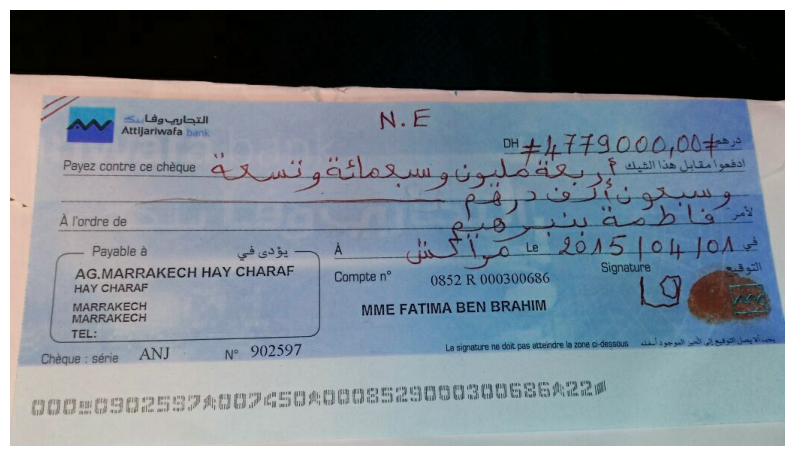

In [101]:
import cv2

def display_highest_confidence_bbox(image_path, confidences, bboxes):
    # Find index of bounding box with highest confidence
    max_conf_idx = confidences.argmax()

    # Get coordinates of bounding box with highest confidence
    bbox = bboxes[max_conf_idx]
    x_min, y_min, x_max, y_max = bbox.astype(int)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    color = (0, 0, 255)  # Green color for bounding box
    thickness = 200
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

    display_image(image)
display_highest_confidence_bbox(image_path, confidences, bboxes)

In [183]:
draw_bounding_boxes(img, [  [1334, 169911  , 519842  , 205444]  ])

AttributeError: 'Tensor' object has no attribute 'load'

In [104]:
[int(cord ) for cord in list(bboxes[0])]

[1334, 169911, 519842, 205444]

In [77]:
import pandas as pd 
import random 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches
import os
import os
import subprocess
from concurrent.futures import ProcessPoolExecutor,ThreadPoolExecutor,as_completed
from tqdm import tqdm
import random
os.environ['OMP_THREAD_LIMIT'] = '1'

In [143]:
import torch
from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.utils import postprocess
from torchvision import transforms

class Predictor(object):
    def __init__(
        self,
        model,
        exp,
        cls_names=COCO_CLASSES,
        trt_file=None,
        decoder=None,
        device="cpu",
        fp16=False,
        legacy=False,
    ):
        self.model = model.to(device).eval()
        self.cls_names = cls_names
        self.decoder = decoder
        self.device = device
        self.input_size = (640, 640)  # Adjust this size according to your model

    def transform_image(self, img):
        transform = transforms.Compose([
            transforms.Resize((640, 640)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        return transform(img).unsqueeze(0).to(self.device)

    def inference(self, img):
        # Convert image to PyTorch tensor and move to device
        img = self.transform_image(img)
        with torch.no_grad():
            outputs = self.model(img)
        results = postprocess(outputs, len(self.cls_names))  # Pass the number of classes instead of cls_names
        return results


    def predict(self, img):
        # Run inference and postprocess the outputs
        outputs = self.inference(img)
        results = postprocess(outputs, self.cls_names)

        return results


In [147]:
import cv2
from PIL import Image
import numpy as np

def detect_objects(image_path, predictor):
    # Load image
    img = Image.open(image_path).convert("RGB")

    # Apply transformations
    img_info = {"id": 0}
    img_info["file_name"] = image_path
    img_info["width"], img_info["height"] = img.size

    # Perform prediction
    results = predictor.predict(img)

    # Extract bounding box coordinates
    boxes = results[:, 0:4]
    confidences = results[:, 4]
    class_ids = results[:, 5]

    # Filter out low confidence detections
    mask = confidences > 0.5
    boxes = boxes[mask]
    class_ids = class_ids[mask]

    # Convert normalized coordinates to image coordinates
    height, width = img.size
    boxes[:, 0::2] *= width
    boxes[:, 1::2] *= height

    return boxes.tolist(), class_ids.tolist()


In [ ]:
if __name__ == "__main__":
    # Instantiate the predictor with your model
    predictor = Predictor(model, exp)

    # Detect objects
    boxes, class_ids = detect_objects(image_path, predictor)

    print("Bounding box coordinates:", boxes)
    print("Class IDs:", class_ids)


In [13]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import argparse
import os
import time
from loguru import logger

import cv2

import torch

from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.exp import get_exp
from yolox.utils import fuse_model, get_model_info, postprocess, vis
import torch
from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.utils import postprocess
from torchvision import transforms

IMAGE_EXT = [".jpg", ".jpeg", ".webp", ".bmp", ".png"]


def make_parser():
    parser = argparse.ArgumentParser("YOLOX Demo!")
    parser.add_argument(
        "demo", default="image", help="demo type, eg. image, video and webcam"
    )
    parser.add_argument("-expn", "--experiment-name", type=str, default=None)
    parser.add_argument("-n", "--name", type=str, default=None, help="model name")

    parser.add_argument(
        "--path", default="./assets/dog.jpg", help="path to images or video"
    )
    parser.add_argument("--camid", type=int, default=0, help="webcam demo camera id")
    parser.add_argument(
        "--save_result",
        action="store_true",
        help="whether to save the inference result of image/video",
    )

    # exp file
    parser.add_argument(
        "-f",
        "--exp_file",
        default=None,
        type=str,
        help="please input your experiment description file",
    )
    parser.add_argument("-c", "--ckpt", default=None, type=str, help="ckpt for eval")
    parser.add_argument(
        "--device",
        default="cpu",
        type=str,
        help="device to run our model, can either be cpu or gpu",
    )
    parser.add_argument("--conf", default=0.3, type=float, help="test conf")
    parser.add_argument("--nms", default=0.3, type=float, help="test nms threshold")
    parser.add_argument("--tsize", default=None, type=int, help="test img size")
    parser.add_argument(
        "--fp16",
        dest="fp16",
        default=False,
        action="store_true",
        help="Adopting mix precision evaluating.",
    )
    parser.add_argument(
        "--legacy",
        dest="legacy",
        default=False,
        action="store_true",
        help="To be compatible with older versions",
    )
    parser.add_argument(
        "--fuse",
        dest="fuse",
        default=False,
        action="store_true",
        help="Fuse conv and bn for testing.",
    )
    parser.add_argument(
        "--trt",
        dest="trt",
        default=False,
        action="store_true",
        help="Using TensorRT model for testing.",
    )
    return parser


def get_image_list(path):
    image_names = []
    for maindir, subdir, file_name_list in os.walk(path):
        for filename in file_name_list:
            apath = os.path.join(maindir, filename)
            ext = os.path.splitext(apath)[1]
            if ext in IMAGE_EXT:
                image_names.append(apath)
    return image_names


class Predictor(object):
    def __init__(
        self,
        model,
        exp,
        cls_names=COCO_CLASSES,
        trt_file=None,
        decoder=None,
        device="cpu",
        fp16=False,
        legacy=False,
    ):
        self.model = model
        self.cls_names = cls_names
        self.decoder = decoder
        self.num_classes = exp.num_classes
        self.confthre = exp.test_conf
        self.nmsthre = exp.nmsthre
        self.test_size = exp.test_size
        self.device = device
        self.fp16 = fp16
        self.preproc = ValTransform(legacy=legacy)
        if trt_file is not None:
            from torch2trt import TRTModule

            model_trt = TRTModule()
            model_trt.load_state_dict(torch.load(trt_file))

            x = torch.ones(1, 3, exp.test_size[0], exp.test_size[1]).cuda()
            self.model(x)
            self.model = model_trt

    def inference(self, img):
        img_info = {"id": 0}
        if isinstance(img, str):
            img_info["file_name"] = os.path.basename(img)
            img = cv2.imread(img)
        else:
            img_info["file_name"] = None

        height, width = img.shape[:2]
        img_info["height"] = height
        img_info["width"] = width
        img_info["raw_img"] = img

        ratio = min(self.test_size[0] / img.shape[0], self.test_size[1] / img.shape[1])
        img_info["ratio"] = ratio

        img, _ = self.preproc(img, None, self.test_size)
        img = torch.from_numpy(img).unsqueeze(0)
        img = img.float()
        if self.device == "gpu":
            img = img.cuda()
            if self.fp16:
                img = img.half()  # to FP16

        with torch.no_grad():
            t0 = time.time()
            outputs = self.model(img)
            if self.decoder is not None:
                outputs = self.decoder(outputs, dtype=outputs.type())
            outputs = postprocess(
                outputs, self.num_classes, self.confthre,
                self.nmsthre, class_agnostic=True
            )
            logger.info("Infer time: {:.4f}s".format(time.time() - t0))
        return outputs, img_info

    def visual(self, output, img_info, cls_conf=0.35):
        ratio = img_info["ratio"]
        img = img_info["raw_img"]
        if output is None:
            return img
        output = output.cpu()

        bboxes = output[:, 0:4]

        # preprocessing: resize
        bboxes /= ratio

        cls = output[:, 6]
        scores = output[:, 4] * output[:, 5]

        vis_res = vis(img, bboxes, scores, cls, cls_conf, self.cls_names)
        return vis_res


def image_demo(predictor, vis_folder, path, current_time, save_result):
    if os.path.isdir(path):
        files = get_image_list(path)
    else:
        files = [path]
    files.sort()
    for image_name in files:
        outputs, img_info = predictor.inference(image_name)
        result_image = predictor.visual(outputs[0], img_info, predictor.confthre)
        if save_result:
            save_folder = os.path.join(
                vis_folder, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
            )
            os.makedirs(save_folder, exist_ok=True)
            save_file_name = os.path.join(save_folder, os.path.basename(image_name))
            logger.info("Saving detection result in {}".format(save_file_name))
            cv2.imwrite(save_file_name, result_image)
        ch = cv2.waitKey(0)
        if ch == 27 or ch == ord("q") or ch == ord("Q"):
            break


def imageflow_demo(predictor, vis_folder, current_time, args):
    cap = cv2.VideoCapture(args.path if args.demo == "video" else args.camid)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
    fps = cap.get(cv2.CAP_PROP_FPS)
    if args.save_result:
        save_folder = os.path.join(
            vis_folder, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
        )
        os.makedirs(save_folder, exist_ok=True)
        if args.demo == "video":
            save_path = os.path.join(save_folder, os.path.basename(args.path))
        else:
            save_path = os.path.join(save_folder, "camera.mp4")
        logger.info(f"video save_path is {save_path}")
        vid_writer = cv2.VideoWriter(
            save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (int(width), int(height))
        )
    while True:
        ret_val, frame = cap.read()
        if ret_val:
            outputs, img_info = predictor.inference(frame)
            result_frame = predictor.visual(outputs[0], img_info, predictor.confthre)
            if args.save_result:
                vid_writer.write(result_frame)
            else:
                cv2.namedWindow("yolox", cv2.WINDOW_NORMAL)
                cv2.imshow("yolox", result_frame)
            ch = cv2.waitKey(1)
            if ch == 27 or ch == ord("q") or ch == ord("Q"):
                break
        else:
            break


def main(exp, args):
    if not args.experiment_name:
        args.experiment_name = exp.exp_name

    file_name = os.path.join(exp.output_dir, args.experiment_name)
    os.makedirs(file_name, exist_ok=True)

    vis_folder = None
    if args.save_result:
        vis_folder = os.path.join(file_name, "vis_res")
        os.makedirs(vis_folder, exist_ok=True)

    if args.trt:
        args.device = "gpu"

    logger.info("Args: {}".format(args))

    if args.conf is not None:
        exp.test_conf = args.conf
    if args.nms is not None:
        exp.nmsthre = args.nms
    if args.tsize is not None:
        exp.test_size = (args.tsize, args.tsize)

    model = exp.get_model()
    logger.info("Model Summary: {}".format(get_model_info(model, exp.test_size)))

    if args.device == "gpu":
        model.cuda()
        if args.fp16:
            model.half()  # to FP16
    model.eval()

    if not args.trt:
        if args.ckpt is None:
            ckpt_file = os.path.join(file_name, "best_ckpt.pth")
        else:
            ckpt_file = args.ckpt
        logger.info("loading checkpoint")
        ckpt = torch.load(ckpt_file, map_location="cpu")
        # load the model state dict
        model.load_state_dict(ckpt["model"])
        logger.info("loaded checkpoint done.")

    if args.fuse:
        logger.info("\tFusing model...")
        model = fuse_model(model)

    if args.trt:
        assert not args.fuse, "TensorRT model is not support model fusing!"
        trt_file = os.path.join(file_name, "model_trt.pth")
        assert os.path.exists(
            trt_file
        ), "TensorRT model is not found!\n Run python3 tools/trt.py first!"
        model.head.decode_in_inference = False
        decoder = model.head.decode_outputs
        logger.info("Using TensorRT to inference")
    else:
        trt_file = None
        decoder = None

    predictor = Predictor(
        model, exp, COCO_CLASSES, trt_file, decoder,
        args.device, args.fp16, args.legacy,
    )
    current_time = time.localtime()
    if args.demo == "image":
        image_demo(predictor, vis_folder, args.path, current_time, args.save_result)
    elif args.demo == "video" or args.demo == "webcam":
        imageflow_demo(predictor, vis_folder, current_time, args)


In [108]:
import os
import cv2
import torch
from yolox.exp import get_exp
from yolox.utils import postprocess, vis
from torch.nn import  Module

ckpt_file = "../models/best_ckpt_rib_aug.pth"
exp_file = "../models/yolox_s_cheques_real_aug_RIB2702.py"
exp = get_exp(exp_file)
exp

╒═══════════════════╤════════════════════════════════════╕
│ keys              │ values                             │
╞═══════════════════╪════════════════════════════════════╡
│ seed              │ None                               │
├───────────────────┼────────────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'                  │
├───────────────────┼────────────────────────────────────┤
│ print_interval    │ 10                                 │
├───────────────────┼────────────────────────────────────┤
│ eval_interval     │ 1                                  │
├───────────────────┼────────────────────────────────────┤
│ dataset           │ None                               │
├───────────────────┼────────────────────────────────────┤
│ num_classes       │ 1                                  │
├───────────────────┼────────────────────────────────────┤
│ depth             │ 0.33                               │
├───────────────────┼───────────────────────────────────

In [111]:
predictor = Predictor(model=None, exp=exp, trt_file=None, device="cpu", fp16=False, legacy=False)
ckpt = torch.load(ckpt_file, map_location='cpu')#['model']
model = exp.get_model()
model.load_state_dict(ckpt)
predictor.model = model 

RuntimeError: Error(s) in loading state_dict for YOLOX:
	Missing key(s) in state_dict: "backbone.backbone.stem.conv.conv.weight", "backbone.backbone.stem.conv.bn.weight", "backbone.backbone.stem.conv.bn.bias", "backbone.backbone.stem.conv.bn.running_mean", "backbone.backbone.stem.conv.bn.running_var", "backbone.backbone.dark2.0.conv.weight", "backbone.backbone.dark2.0.bn.weight", "backbone.backbone.dark2.0.bn.bias", "backbone.backbone.dark2.0.bn.running_mean", "backbone.backbone.dark2.0.bn.running_var", "backbone.backbone.dark2.1.conv1.conv.weight", "backbone.backbone.dark2.1.conv1.bn.weight", "backbone.backbone.dark2.1.conv1.bn.bias", "backbone.backbone.dark2.1.conv1.bn.running_mean", "backbone.backbone.dark2.1.conv1.bn.running_var", "backbone.backbone.dark2.1.conv2.conv.weight", "backbone.backbone.dark2.1.conv2.bn.weight", "backbone.backbone.dark2.1.conv2.bn.bias", "backbone.backbone.dark2.1.conv2.bn.running_mean", "backbone.backbone.dark2.1.conv2.bn.running_var", "backbone.backbone.dark2.1.conv3.conv.weight", "backbone.backbone.dark2.1.conv3.bn.weight", "backbone.backbone.dark2.1.conv3.bn.bias", "backbone.backbone.dark2.1.conv3.bn.running_mean", "backbone.backbone.dark2.1.conv3.bn.running_var", "backbone.backbone.dark2.1.m.0.conv1.conv.weight", "backbone.backbone.dark2.1.m.0.conv1.bn.weight", "backbone.backbone.dark2.1.m.0.conv1.bn.bias", "backbone.backbone.dark2.1.m.0.conv1.bn.running_mean", "backbone.backbone.dark2.1.m.0.conv1.bn.running_var", "backbone.backbone.dark2.1.m.0.conv2.conv.weight", "backbone.backbone.dark2.1.m.0.conv2.bn.weight", "backbone.backbone.dark2.1.m.0.conv2.bn.bias", "backbone.backbone.dark2.1.m.0.conv2.bn.running_mean", "backbone.backbone.dark2.1.m.0.conv2.bn.running_var", "backbone.backbone.dark3.0.conv.weight", "backbone.backbone.dark3.0.bn.weight", "backbone.backbone.dark3.0.bn.bias", "backbone.backbone.dark3.0.bn.running_mean", "backbone.backbone.dark3.0.bn.running_var", "backbone.backbone.dark3.1.conv1.conv.weight", "backbone.backbone.dark3.1.conv1.bn.weight", "backbone.backbone.dark3.1.conv1.bn.bias", "backbone.backbone.dark3.1.conv1.bn.running_mean", "backbone.backbone.dark3.1.conv1.bn.running_var", "backbone.backbone.dark3.1.conv2.conv.weight", "backbone.backbone.dark3.1.conv2.bn.weight", "backbone.backbone.dark3.1.conv2.bn.bias", "backbone.backbone.dark3.1.conv2.bn.running_mean", "backbone.backbone.dark3.1.conv2.bn.running_var", "backbone.backbone.dark3.1.conv3.conv.weight", "backbone.backbone.dark3.1.conv3.bn.weight", "backbone.backbone.dark3.1.conv3.bn.bias", "backbone.backbone.dark3.1.conv3.bn.running_mean", "backbone.backbone.dark3.1.conv3.bn.running_var", "backbone.backbone.dark3.1.m.0.conv1.conv.weight", "backbone.backbone.dark3.1.m.0.conv1.bn.weight", "backbone.backbone.dark3.1.m.0.conv1.bn.bias", "backbone.backbone.dark3.1.m.0.conv1.bn.running_mean", "backbone.backbone.dark3.1.m.0.conv1.bn.running_var", "backbone.backbone.dark3.1.m.0.conv2.conv.weight", "backbone.backbone.dark3.1.m.0.conv2.bn.weight", "backbone.backbone.dark3.1.m.0.conv2.bn.bias", "backbone.backbone.dark3.1.m.0.conv2.bn.running_mean", "backbone.backbone.dark3.1.m.0.conv2.bn.running_var", "backbone.backbone.dark3.1.m.1.conv1.conv.weight", "backbone.backbone.dark3.1.m.1.conv1.bn.weight", "backbone.backbone.dark3.1.m.1.conv1.bn.bias", "backbone.backbone.dark3.1.m.1.conv1.bn.running_mean", "backbone.backbone.dark3.1.m.1.conv1.bn.running_var", "backbone.backbone.dark3.1.m.1.conv2.conv.weight", "backbone.backbone.dark3.1.m.1.conv2.bn.weight", "backbone.backbone.dark3.1.m.1.conv2.bn.bias", "backbone.backbone.dark3.1.m.1.conv2.bn.running_mean", "backbone.backbone.dark3.1.m.1.conv2.bn.running_var", "backbone.backbone.dark3.1.m.2.conv1.conv.weight", "backbone.backbone.dark3.1.m.2.conv1.bn.weight", "backbone.backbone.dark3.1.m.2.conv1.bn.bias", "backbone.backbone.dark3.1.m.2.conv1.bn.running_mean", "backbone.backbone.dark3.1.m.2.conv1.bn.running_var", "backbone.backbone.dark3.1.m.2.conv2.conv.weight", "backbone.backbone.dark3.1.m.2.conv2.bn.weight", "backbone.backbone.dark3.1.m.2.conv2.bn.bias", "backbone.backbone.dark3.1.m.2.conv2.bn.running_mean", "backbone.backbone.dark3.1.m.2.conv2.bn.running_var", "backbone.backbone.dark4.0.conv.weight", "backbone.backbone.dark4.0.bn.weight", "backbone.backbone.dark4.0.bn.bias", "backbone.backbone.dark4.0.bn.running_mean", "backbone.backbone.dark4.0.bn.running_var", "backbone.backbone.dark4.1.conv1.conv.weight", "backbone.backbone.dark4.1.conv1.bn.weight", "backbone.backbone.dark4.1.conv1.bn.bias", "backbone.backbone.dark4.1.conv1.bn.running_mean", "backbone.backbone.dark4.1.conv1.bn.running_var", "backbone.backbone.dark4.1.conv2.conv.weight", "backbone.backbone.dark4.1.conv2.bn.weight", "backbone.backbone.dark4.1.conv2.bn.bias", "backbone.backbone.dark4.1.conv2.bn.running_mean", "backbone.backbone.dark4.1.conv2.bn.running_var", "backbone.backbone.dark4.1.conv3.conv.weight", "backbone.backbone.dark4.1.conv3.bn.weight", "backbone.backbone.dark4.1.conv3.bn.bias", "backbone.backbone.dark4.1.conv3.bn.running_mean", "backbone.backbone.dark4.1.conv3.bn.running_var", "backbone.backbone.dark4.1.m.0.conv1.conv.weight", "backbone.backbone.dark4.1.m.0.conv1.bn.weight", "backbone.backbone.dark4.1.m.0.conv1.bn.bias", "backbone.backbone.dark4.1.m.0.conv1.bn.running_mean", "backbone.backbone.dark4.1.m.0.conv1.bn.running_var", "backbone.backbone.dark4.1.m.0.conv2.conv.weight", "backbone.backbone.dark4.1.m.0.conv2.bn.weight", "backbone.backbone.dark4.1.m.0.conv2.bn.bias", "backbone.backbone.dark4.1.m.0.conv2.bn.running_mean", "backbone.backbone.dark4.1.m.0.conv2.bn.running_var", "backbone.backbone.dark4.1.m.1.conv1.conv.weight", "backbone.backbone.dark4.1.m.1.conv1.bn.weight", "backbone.backbone.dark4.1.m.1.conv1.bn.bias", "backbone.backbone.dark4.1.m.1.conv1.bn.running_mean", "backbone.backbone.dark4.1.m.1.conv1.bn.running_var", "backbone.backbone.dark4.1.m.1.conv2.conv.weight", "backbone.backbone.dark4.1.m.1.conv2.bn.weight", "backbone.backbone.dark4.1.m.1.conv2.bn.bias", "backbone.backbone.dark4.1.m.1.conv2.bn.running_mean", "backbone.backbone.dark4.1.m.1.conv2.bn.running_var", "backbone.backbone.dark4.1.m.2.conv1.conv.weight", "backbone.backbone.dark4.1.m.2.conv1.bn.weight", "backbone.backbone.dark4.1.m.2.conv1.bn.bias", "backbone.backbone.dark4.1.m.2.conv1.bn.running_mean", "backbone.backbone.dark4.1.m.2.conv1.bn.running_var", "backbone.backbone.dark4.1.m.2.conv2.conv.weight", "backbone.backbone.dark4.1.m.2.conv2.bn.weight", "backbone.backbone.dark4.1.m.2.conv2.bn.bias", "backbone.backbone.dark4.1.m.2.conv2.bn.running_mean", "backbone.backbone.dark4.1.m.2.conv2.bn.running_var", "backbone.backbone.dark5.0.conv.weight", "backbone.backbone.dark5.0.bn.weight", "backbone.backbone.dark5.0.bn.bias", "backbone.backbone.dark5.0.bn.running_mean", "backbone.backbone.dark5.0.bn.running_var", "backbone.backbone.dark5.1.conv1.conv.weight", "backbone.backbone.dark5.1.conv1.bn.weight", "backbone.backbone.dark5.1.conv1.bn.bias", "backbone.backbone.dark5.1.conv1.bn.running_mean", "backbone.backbone.dark5.1.conv1.bn.running_var", "backbone.backbone.dark5.1.conv2.conv.weight", "backbone.backbone.dark5.1.conv2.bn.weight", "backbone.backbone.dark5.1.conv2.bn.bias", "backbone.backbone.dark5.1.conv2.bn.running_mean", "backbone.backbone.dark5.1.conv2.bn.running_var", "backbone.backbone.dark5.2.conv1.conv.weight", "backbone.backbone.dark5.2.conv1.bn.weight", "backbone.backbone.dark5.2.conv1.bn.bias", "backbone.backbone.dark5.2.conv1.bn.running_mean", "backbone.backbone.dark5.2.conv1.bn.running_var", "backbone.backbone.dark5.2.conv2.conv.weight", "backbone.backbone.dark5.2.conv2.bn.weight", "backbone.backbone.dark5.2.conv2.bn.bias", "backbone.backbone.dark5.2.conv2.bn.running_mean", "backbone.backbone.dark5.2.conv2.bn.running_var", "backbone.backbone.dark5.2.conv3.conv.weight", "backbone.backbone.dark5.2.conv3.bn.weight", "backbone.backbone.dark5.2.conv3.bn.bias", "backbone.backbone.dark5.2.conv3.bn.running_mean", "backbone.backbone.dark5.2.conv3.bn.running_var", "backbone.backbone.dark5.2.m.0.conv1.conv.weight", "backbone.backbone.dark5.2.m.0.conv1.bn.weight", "backbone.backbone.dark5.2.m.0.conv1.bn.bias", "backbone.backbone.dark5.2.m.0.conv1.bn.running_mean", "backbone.backbone.dark5.2.m.0.conv1.bn.running_var", "backbone.backbone.dark5.2.m.0.conv2.conv.weight", "backbone.backbone.dark5.2.m.0.conv2.bn.weight", "backbone.backbone.dark5.2.m.0.conv2.bn.bias", "backbone.backbone.dark5.2.m.0.conv2.bn.running_mean", "backbone.backbone.dark5.2.m.0.conv2.bn.running_var", "backbone.lateral_conv0.conv.weight", "backbone.lateral_conv0.bn.weight", "backbone.lateral_conv0.bn.bias", "backbone.lateral_conv0.bn.running_mean", "backbone.lateral_conv0.bn.running_var", "backbone.C3_p4.conv1.conv.weight", "backbone.C3_p4.conv1.bn.weight", "backbone.C3_p4.conv1.bn.bias", "backbone.C3_p4.conv1.bn.running_mean", "backbone.C3_p4.conv1.bn.running_var", "backbone.C3_p4.conv2.conv.weight", "backbone.C3_p4.conv2.bn.weight", "backbone.C3_p4.conv2.bn.bias", "backbone.C3_p4.conv2.bn.running_mean", "backbone.C3_p4.conv2.bn.running_var", "backbone.C3_p4.conv3.conv.weight", "backbone.C3_p4.conv3.bn.weight", "backbone.C3_p4.conv3.bn.bias", "backbone.C3_p4.conv3.bn.running_mean", "backbone.C3_p4.conv3.bn.running_var", "backbone.C3_p4.m.0.conv1.conv.weight", "backbone.C3_p4.m.0.conv1.bn.weight", "backbone.C3_p4.m.0.conv1.bn.bias", "backbone.C3_p4.m.0.conv1.bn.running_mean", "backbone.C3_p4.m.0.conv1.bn.running_var", "backbone.C3_p4.m.0.conv2.conv.weight", "backbone.C3_p4.m.0.conv2.bn.weight", "backbone.C3_p4.m.0.conv2.bn.bias", "backbone.C3_p4.m.0.conv2.bn.running_mean", "backbone.C3_p4.m.0.conv2.bn.running_var", "backbone.reduce_conv1.conv.weight", "backbone.reduce_conv1.bn.weight", "backbone.reduce_conv1.bn.bias", "backbone.reduce_conv1.bn.running_mean", "backbone.reduce_conv1.bn.running_var", "backbone.C3_p3.conv1.conv.weight", "backbone.C3_p3.conv1.bn.weight", "backbone.C3_p3.conv1.bn.bias", "backbone.C3_p3.conv1.bn.running_mean", "backbone.C3_p3.conv1.bn.running_var", "backbone.C3_p3.conv2.conv.weight", "backbone.C3_p3.conv2.bn.weight", "backbone.C3_p3.conv2.bn.bias", "backbone.C3_p3.conv2.bn.running_mean", "backbone.C3_p3.conv2.bn.running_var", "backbone.C3_p3.conv3.conv.weight", "backbone.C3_p3.conv3.bn.weight", "backbone.C3_p3.conv3.bn.bias", "backbone.C3_p3.conv3.bn.running_mean", "backbone.C3_p3.conv3.bn.running_var", "backbone.C3_p3.m.0.conv1.conv.weight", "backbone.C3_p3.m.0.conv1.bn.weight", "backbone.C3_p3.m.0.conv1.bn.bias", "backbone.C3_p3.m.0.conv1.bn.running_mean", "backbone.C3_p3.m.0.conv1.bn.running_var", "backbone.C3_p3.m.0.conv2.conv.weight", "backbone.C3_p3.m.0.conv2.bn.weight", "backbone.C3_p3.m.0.conv2.bn.bias", "backbone.C3_p3.m.0.conv2.bn.running_mean", "backbone.C3_p3.m.0.conv2.bn.running_var", "backbone.bu_conv2.conv.weight", "backbone.bu_conv2.bn.weight", "backbone.bu_conv2.bn.bias", "backbone.bu_conv2.bn.running_mean", "backbone.bu_conv2.bn.running_var", "backbone.C3_n3.conv1.conv.weight", "backbone.C3_n3.conv1.bn.weight", "backbone.C3_n3.conv1.bn.bias", "backbone.C3_n3.conv1.bn.running_mean", "backbone.C3_n3.conv1.bn.running_var", "backbone.C3_n3.conv2.conv.weight", "backbone.C3_n3.conv2.bn.weight", "backbone.C3_n3.conv2.bn.bias", "backbone.C3_n3.conv2.bn.running_mean", "backbone.C3_n3.conv2.bn.running_var", "backbone.C3_n3.conv3.conv.weight", "backbone.C3_n3.conv3.bn.weight", "backbone.C3_n3.conv3.bn.bias", "backbone.C3_n3.conv3.bn.running_mean", "backbone.C3_n3.conv3.bn.running_var", "backbone.C3_n3.m.0.conv1.conv.weight", "backbone.C3_n3.m.0.conv1.bn.weight", "backbone.C3_n3.m.0.conv1.bn.bias", "backbone.C3_n3.m.0.conv1.bn.running_mean", "backbone.C3_n3.m.0.conv1.bn.running_var", "backbone.C3_n3.m.0.conv2.conv.weight", "backbone.C3_n3.m.0.conv2.bn.weight", "backbone.C3_n3.m.0.conv2.bn.bias", "backbone.C3_n3.m.0.conv2.bn.running_mean", "backbone.C3_n3.m.0.conv2.bn.running_var", "backbone.bu_conv1.conv.weight", "backbone.bu_conv1.bn.weight", "backbone.bu_conv1.bn.bias", "backbone.bu_conv1.bn.running_mean", "backbone.bu_conv1.bn.running_var", "backbone.C3_n4.conv1.conv.weight", "backbone.C3_n4.conv1.bn.weight", "backbone.C3_n4.conv1.bn.bias", "backbone.C3_n4.conv1.bn.running_mean", "backbone.C3_n4.conv1.bn.running_var", "backbone.C3_n4.conv2.conv.weight", "backbone.C3_n4.conv2.bn.weight", "backbone.C3_n4.conv2.bn.bias", "backbone.C3_n4.conv2.bn.running_mean", "backbone.C3_n4.conv2.bn.running_var", "backbone.C3_n4.conv3.conv.weight", "backbone.C3_n4.conv3.bn.weight", "backbone.C3_n4.conv3.bn.bias", "backbone.C3_n4.conv3.bn.running_mean", "backbone.C3_n4.conv3.bn.running_var", "backbone.C3_n4.m.0.conv1.conv.weight", "backbone.C3_n4.m.0.conv1.bn.weight", "backbone.C3_n4.m.0.conv1.bn.bias", "backbone.C3_n4.m.0.conv1.bn.running_mean", "backbone.C3_n4.m.0.conv1.bn.running_var", "backbone.C3_n4.m.0.conv2.conv.weight", "backbone.C3_n4.m.0.conv2.bn.weight", "backbone.C3_n4.m.0.conv2.bn.bias", "backbone.C3_n4.m.0.conv2.bn.running_mean", "backbone.C3_n4.m.0.conv2.bn.running_var", "head.cls_convs.0.0.conv.weight", "head.cls_convs.0.0.bn.weight", "head.cls_convs.0.0.bn.bias", "head.cls_convs.0.0.bn.running_mean", "head.cls_convs.0.0.bn.running_var", "head.cls_convs.0.1.conv.weight", "head.cls_convs.0.1.bn.weight", "head.cls_convs.0.1.bn.bias", "head.cls_convs.0.1.bn.running_mean", "head.cls_convs.0.1.bn.running_var", "head.cls_convs.1.0.conv.weight", "head.cls_convs.1.0.bn.weight", "head.cls_convs.1.0.bn.bias", "head.cls_convs.1.0.bn.running_mean", "head.cls_convs.1.0.bn.running_var", "head.cls_convs.1.1.conv.weight", "head.cls_convs.1.1.bn.weight", "head.cls_convs.1.1.bn.bias", "head.cls_convs.1.1.bn.running_mean", "head.cls_convs.1.1.bn.running_var", "head.cls_convs.2.0.conv.weight", "head.cls_convs.2.0.bn.weight", "head.cls_convs.2.0.bn.bias", "head.cls_convs.2.0.bn.running_mean", "head.cls_convs.2.0.bn.running_var", "head.cls_convs.2.1.conv.weight", "head.cls_convs.2.1.bn.weight", "head.cls_convs.2.1.bn.bias", "head.cls_convs.2.1.bn.running_mean", "head.cls_convs.2.1.bn.running_var", "head.reg_convs.0.0.conv.weight", "head.reg_convs.0.0.bn.weight", "head.reg_convs.0.0.bn.bias", "head.reg_convs.0.0.bn.running_mean", "head.reg_convs.0.0.bn.running_var", "head.reg_convs.0.1.conv.weight", "head.reg_convs.0.1.bn.weight", "head.reg_convs.0.1.bn.bias", "head.reg_convs.0.1.bn.running_mean", "head.reg_convs.0.1.bn.running_var", "head.reg_convs.1.0.conv.weight", "head.reg_convs.1.0.bn.weight", "head.reg_convs.1.0.bn.bias", "head.reg_convs.1.0.bn.running_mean", "head.reg_convs.1.0.bn.running_var", "head.reg_convs.1.1.conv.weight", "head.reg_convs.1.1.bn.weight", "head.reg_convs.1.1.bn.bias", "head.reg_convs.1.1.bn.running_mean", "head.reg_convs.1.1.bn.running_var", "head.reg_convs.2.0.conv.weight", "head.reg_convs.2.0.bn.weight", "head.reg_convs.2.0.bn.bias", "head.reg_convs.2.0.bn.running_mean", "head.reg_convs.2.0.bn.running_var", "head.reg_convs.2.1.conv.weight", "head.reg_convs.2.1.bn.weight", "head.reg_convs.2.1.bn.bias", "head.reg_convs.2.1.bn.running_mean", "head.reg_convs.2.1.bn.running_var", "head.cls_preds.0.weight", "head.cls_preds.0.bias", "head.cls_preds.1.weight", "head.cls_preds.1.bias", "head.cls_preds.2.weight", "head.cls_preds.2.bias", "head.reg_preds.0.weight", "head.reg_preds.0.bias", "head.reg_preds.1.weight", "head.reg_preds.1.bias", "head.reg_preds.2.weight", "head.reg_preds.2.bias", "head.obj_preds.0.weight", "head.obj_preds.0.bias", "head.obj_preds.1.weight", "head.obj_preds.1.bias", "head.obj_preds.2.weight", "head.obj_preds.2.bias", "head.stems.0.conv.weight", "head.stems.0.bn.weight", "head.stems.0.bn.bias", "head.stems.0.bn.running_mean", "head.stems.0.bn.running_var", "head.stems.1.conv.weight", "head.stems.1.bn.weight", "head.stems.1.bn.bias", "head.stems.1.bn.running_mean", "head.stems.1.bn.running_var", "head.stems.2.conv.weight", "head.stems.2.bn.weight", "head.stems.2.bn.bias", "head.stems.2.bn.running_mean", "head.stems.2.bn.running_var". 
	Unexpected key(s) in state_dict: "start_epoch", "model", "optimizer", "best_ap", "curr_ap". 

In [106]:
print(ckpt)

{'start_epoch': 200, 'model': OrderedDict([('backbone.backbone.stem.conv.conv.weight', tensor([[[[-1.5663e-02, -3.3198e-02, -6.0788e-02],
          [-7.0952e-02, -7.9596e-02, -1.6832e-01],
          [-4.9712e-02,  2.6283e-01,  1.7734e-01]],

         [[-1.3798e-02, -9.5871e-03, -1.4786e-02],
          [-1.7974e-02, -4.1749e-02, -8.4755e-02],
          [-2.9888e-03,  8.1733e-02,  4.0601e-02]],

         [[-1.1192e-02, -1.7864e-02, -2.1737e-03],
          [ 3.1675e-02,  1.0173e-01,  1.4675e-01],
          [ 6.8460e-02, -2.0567e-01, -1.5635e-01]],

         ...,

         [[-3.6893e-02, -1.5087e-01, -5.8922e-02],
          [ 4.3646e-02,  1.6380e-01, -2.4659e-02],
          [ 2.7779e-02,  2.0822e-01, -1.8740e-02]],

         [[-2.7512e-02, -7.9686e-02, -2.1691e-03],
          [ 1.2214e-02,  4.3806e-02, -2.3295e-02],
          [ 3.6342e-02,  6.7574e-02, -1.2884e-02]],

         [[ 3.2123e-02,  1.5613e-01,  3.6786e-02],
          [-3.5603e-02, -1.4787e-01, -1.5043e-02],
          [ 2.1023e-0

In [95]:
outputs, img_info = predictor.inference( image_path  ) # np.array(img)

TypeError: 'collections.OrderedDict' object is not callable

In [88]:
image_path = '../images/p2.jpg'
img = cv2.imread(image_path)


In [89]:
def transform_image(img):
        transform = transforms.Compose([
            transforms.Resize((416, 416)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        return transform(img).unsqueeze(0).to('cpu')
img = transform_image(img)

TypeError: Unexpected type <class 'numpy.ndarray'>

In [75]:
def pil_to_cv(pil_image):
    cv_image = np.array(pil_image)
    cv_image = cv_image[:, :, ::-1].copy()
    return cv_image
img =  pil_to_cv(img)

In [94]:
outputs, img_info = predictor.inference( image_path  ) # np.array(img)

TypeError: 'collections.OrderedDict' object is not callable

In [81]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

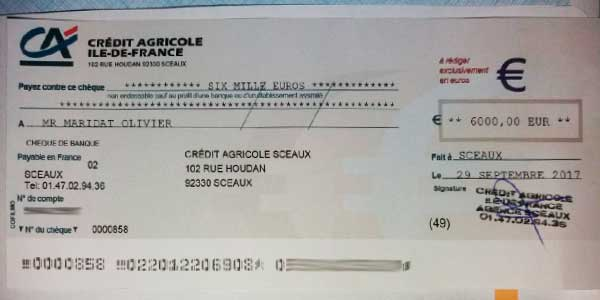

In [82]:
img 

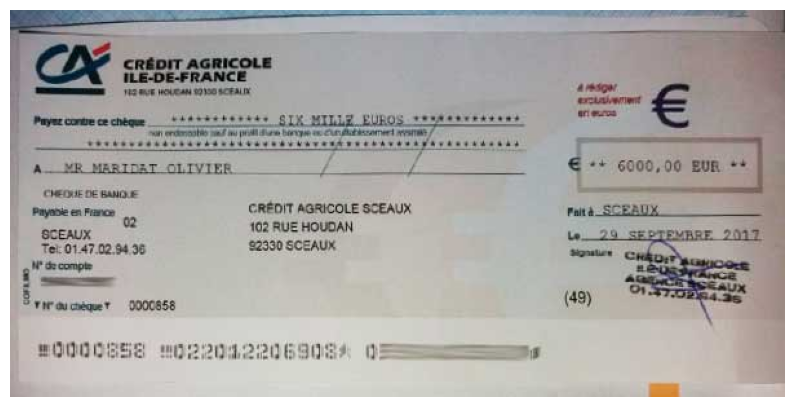

In [83]:
display_image(img )

In [67]:
img

tensor([[[[-0.9192, -0.7993, -0.7822,  ..., -0.1657, -0.2342, -0.6623],
          [-0.9705, -0.8335, -0.7650,  ..., -0.1486, -0.2342, -0.6623],
          [-1.0390, -0.8678, -0.7822,  ..., -0.1486, -0.2342, -0.6623],
          ...,
          [ 0.7248,  0.7591,  0.7762,  ...,  1.2557,  1.2385,  1.2214],
          [ 0.7077,  0.7419,  0.7591,  ...,  1.2557,  1.2385,  1.2214],
          [ 0.6906,  0.7248,  0.7419,  ...,  1.2557,  1.2385,  1.2214]],

         [[-0.4951, -0.3725, -0.3550,  ..., -0.2500, -0.2675, -0.6877],
          [-0.5476, -0.4076, -0.3375,  ..., -0.2325, -0.2675, -0.6877],
          [-0.6176, -0.4426, -0.3550,  ..., -0.2325, -0.2675, -0.6877],
          ...,
          [ 0.6604,  0.6954,  0.7129,  ...,  1.1155,  1.0980,  1.0805],
          [ 0.6429,  0.6779,  0.6954,  ...,  1.1155,  1.0980,  1.0805],
          [ 0.6254,  0.6604,  0.6779,  ...,  1.1155,  1.0980,  1.0805]],

         [[ 0.0779,  0.1999,  0.2173,  ..., -0.0267, -0.0790, -0.4973],
          [ 0.0256,  0.1651,  

In [97]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import argparse
import os
import time
from loguru import logger

import cv2

import torch

from yolox.data.data_augment import ValTransform
from yolox.data.datasets import COCO_CLASSES
from yolox.exp import get_exp
from yolox.utils import fuse_model, get_model_info, postprocess, vis

IMAGE_EXT = [".jpg", ".jpeg", ".webp", ".bmp", ".png"]


def make_parser():
    parser = argparse.ArgumentParser("YOLOX Demo!")
    parser.add_argument(
        "demo", default="image", help="demo type, eg. image, video and webcam"
    )
    parser.add_argument("-expn", "--experiment-name", type=str, default=None)
    parser.add_argument("-n", "--name", type=str, default=None, help="model name")

    parser.add_argument(
        "--path", default="./assets/dog.jpg", help="path to images or video"
    )
    parser.add_argument("--camid", type=int, default=0, help="webcam demo camera id")
    parser.add_argument(
        "--save_result",
        action="store_true",
        help="whether to save the inference result of image/video",
    )

    # exp file
    parser.add_argument(
        "-f",
        "--exp_file",
        default=None,
        type=str,
        help="please input your experiment description file",
    )
    parser.add_argument("-c", "--ckpt", default=None, type=str, help="ckpt for eval")
    parser.add_argument(
        "--device",
        default="cpu",
        type=str,
        help="device to run our model, can either be cpu or gpu",
    )
    parser.add_argument("--conf", default=0.3, type=float, help="test conf")
    parser.add_argument("--nms", default=0.3, type=float, help="test nms threshold")
    parser.add_argument("--tsize", default=None, type=int, help="test img size")
    parser.add_argument(
        "--fp16",
        dest="fp16",
        default=False,
        action="store_true",
        help="Adopting mix precision evaluating.",
    )
    parser.add_argument(
        "--legacy",
        dest="legacy",
        default=False,
        action="store_true",
        help="To be compatible with older versions",
    )
    parser.add_argument(
        "--fuse",
        dest="fuse",
        default=False,
        action="store_true",
        help="Fuse conv and bn for testing.",
    )
    parser.add_argument(
        "--trt",
        dest="trt",
        default=False,
        action="store_true",
        help="Using TensorRT model for testing.",
    )
    return parser


def get_image_list(path):
    image_names = []
    for maindir, subdir, file_name_list in os.walk(path):
        for filename in file_name_list:
            apath = os.path.join(maindir, filename)
            ext = os.path.splitext(apath)[1]
            if ext in IMAGE_EXT:
                image_names.append(apath)
    return image_names


class Predictor(object):
    def __init__(
        self,
        model,
        exp,
        cls_names=COCO_CLASSES,
        trt_file=None,
        decoder=None,
        device="cpu",
        fp16=False,
        legacy=False,
    ):
        self.model = model
        self.cls_names = cls_names
        self.decoder = decoder
        self.num_classes = exp.num_classes
        self.confthre = exp.test_conf
        self.nmsthre = exp.nmsthre
        self.test_size = exp.test_size
        self.device = device
        self.fp16 = fp16
        self.preproc = ValTransform(legacy=legacy)
        if trt_file is not None:
            from torch2trt import TRTModule

            model_trt = TRTModule()
            model_trt.load_state_dict(torch.load(trt_file))

            x = torch.ones(1, 3, exp.test_size[0], exp.test_size[1]).cuda()
            self.model(x)
            self.model = model_trt

    def inference(self, img):
        img_info = {"id": 0}
        if isinstance(img, str):
            img_info["file_name"] = os.path.basename(img)
            img = cv2.imread(img)
        else:
            img_info["file_name"] = None

        height, width = img.shape[:2]
        img_info["height"] = height
        img_info["width"] = width
        img_info["raw_img"] = img

        ratio = min(self.test_size[0] / img.shape[0], self.test_size[1] / img.shape[1])
        img_info["ratio"] = ratio

        img, _ = self.preproc(img, None, self.test_size)
        img = torch.from_numpy(img).unsqueeze(0)
        img = img.float()
        if self.device == "gpu":
            img = img.cuda()
            if self.fp16:
                img = img.half()  # to FP16

        with torch.no_grad():
            t0 = time.time()
            outputs = self.model(img)
            if self.decoder is not None:
                outputs = self.decoder(outputs, dtype=outputs.type())
            outputs = postprocess(
                outputs, self.num_classes, self.confthre,
                self.nmsthre, class_agnostic=True
            )
            logger.info("Infer time: {:.4f}s".format(time.time() - t0))
        return outputs, img_info

    def visual(self, output, img_info, cls_conf=0.35):
        ratio = img_info["ratio"]
        img = img_info["raw_img"]
        if output is None:
            return img
        output = output.cpu()

        bboxes = output[:, 0:4]

        # preprocessing: resize
        bboxes /= ratio

        cls = output[:, 6]
        scores = output[:, 4] * output[:, 5]

        vis_res = vis(img, bboxes, scores, cls, cls_conf, self.cls_names)

        return vis_res  , bboxes 


def image_demo(predictor, vis_folder , bboxes , path, current_time, save_result):
    if os.path.isdir(path):
        files = get_image_list(path)
    else:
        files = [path]
    files.sort()
    for image_name in files:
        outputs, img_info = predictor.inference(image_name)
        result_image , bboxes = predictor.visual(outputs[0], img_info, predictor.confthre)
        if save_result:
            save_folder = os.path.join(
                vis_folder, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
            )
            os.makedirs(save_folder, exist_ok=True)
            save_file_name = os.path.join(save_folder, os.path.basename(image_name))
            logger.info("Saving detection result in {}".format(save_file_name))
            cv2.imwrite(save_file_name, result_image)
        ch = cv2.waitKey(0)
        if ch == 27 or ch == ord("q") or ch == ord("Q"):
            break


def imageflow_demo(predictor, vis_folder, current_time, args):
    cap = cv2.VideoCapture(args.path if args.demo == "video" else args.camid)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
    fps = cap.get(cv2.CAP_PROP_FPS)
    if args.save_result:
        save_folder = os.path.join(
            vis_folder, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
        )
        os.makedirs(save_folder, exist_ok=True)
        if args.demo == "video":
            save_path = os.path.join(save_folder, os.path.basename(args.path))
        else:
            save_path = os.path.join(save_folder, "camera.mp4")
        logger.info(f"video save_path is {save_path}")
        vid_writer = cv2.VideoWriter(
            save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (int(width), int(height))
        )
    while True:
        ret_val, frame = cap.read()
        if ret_val:
            outputs, img_info = predictor.inference(frame)
            result_frame = predictor.visual(outputs[0], img_info, predictor.confthre)
            if args.save_result:
                vid_writer.write(result_frame)
            else:
                cv2.namedWindow("yolox", cv2.WINDOW_NORMAL)
                cv2.imshow("yolox", result_frame)
            ch = cv2.waitKey(1)
            if ch == 27 or ch == ord("q") or ch == ord("Q"):
                break
        else:
            break


def main(exp, args):
    if not args.experiment_name:
        args.experiment_name = exp.exp_name

    '''file_name = os.path.join(exp.output_dir, args.experiment_name)
    os.makedirs(file_name, exist_ok=True)

    vis_folder = None
    if args.save_result:
        vis_folder = os.path.join(file_name, "vis_res")
        os.makedirs(vis_folder, exist_ok=True)'''

    if args.trt:
        args.device = "gpu"

    logger.info("Args: {}".format(args))

    if args.conf is not None:
        exp.test_conf = args.conf
    if args.nms is not None:
        exp.nmsthre = args.nms
    if args.tsize is not None:
        exp.test_size = (args.tsize, args.tsize)

    model = exp.get_model()
    logger.info("Model Summary: {}".format(get_model_info(model, exp.test_size)))

    if args.device == "gpu":
        model.cuda()
        if args.fp16:
            model.half()  # to FP16
    model.eval()

    if not args.trt:
        if args.ckpt is None:
            ckpt_file = os.path.join(file_name, "best_ckpt.pth")
        else:
            ckpt_file = args.ckpt
        logger.info("loading checkpoint")
        ckpt = torch.load(ckpt_file, map_location="cpu")
        # load the model state dict
        model.load_state_dict(ckpt["model"])
        logger.info("loaded checkpoint done.")

    if args.fuse:
        logger.info("\tFusing model...")
        model = fuse_model(model)

    if args.trt:
        assert not args.fuse, "TensorRT model is not support model fusing!"
        trt_file = os.path.join(file_name, "model_trt.pth")
        assert os.path.exists(
            trt_file
        ), "TensorRT model is not found!\n Run python3 tools/trt.py first!"
        model.head.decode_in_inference = False
        decoder = model.head.decode_outputs
        logger.info("Using TensorRT to inference")
    else:
        trt_file = None
        decoder = None

    predictor = Predictor(
        model, exp, COCO_CLASSES, trt_file, decoder,
        args.device, args.fp16, args.legacy,
    )
    current_time = time.localtime()
    if args.demo == "image":
        image_demo(predictor, vis_folder, args.path, current_time, args.save_result)
    elif args.demo == "video" or args.demo == "webcam":
        imageflow_demo(predictor, vis_folder, current_time, args)




In [ ]:
if __name__ == "__main__":
    args = make_parser().parse_args()
    exp = get_exp(args.exp_file, args.name)

    main(exp, args)